In [1]:
import numpy as np
import os
import IIR_filter
import Detect 

In [2]:
recording_name = '20160415_patch2'
Dir = os.path.join('C:/Users/liuxj/Desktop/生医专业/专业实践综合训练2/raw_data',recording_name)
file_name = 'patch_2_MEA.raw'
offset=1871
data = np.memmap(os.path.join(Dir,file_name),dtype='uint16',offset=offset,mode='r')
data = data.reshape(len(data)//256,256)
data = data[:,7:8]#选取示例电极，其中7号电极可以较好地看到两个神经元的信号
data = data.astype('float32')

time_series = data
Fs = 20000
print(time_series)
print(Fs)

[[32798.]
 [32793.]
 [32745.]
 ...
 [33104.]
 [32919.]
 [32772.]]
20000


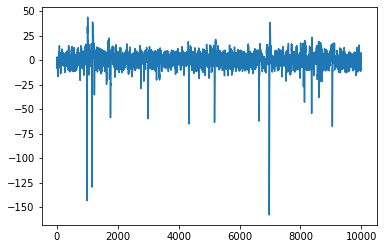

In [3]:
import matplotlib.pyplot as plt
#观察原始波形
raw = IIR_filter.Raw(time_series,Fs)
raw.scale(1,-2**15-1)
raw.scale(0.1042,0)
raw.set_unit('uV')
plt.plot(raw.data[0:10000,0])
plt.show()

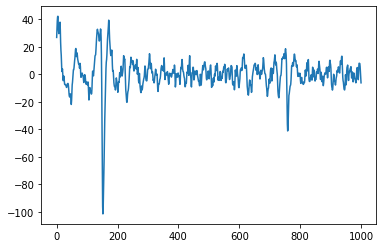

In [4]:
#滤波
spikes = raw.get_spikes()
plt.plot(spikes.data[1000:2001,0])
plt.show()

In [5]:
#峰值检测
detect = Detect.Detect.extract_by_median(spikes,5)
print(detect.n_spikes)


[7033.]


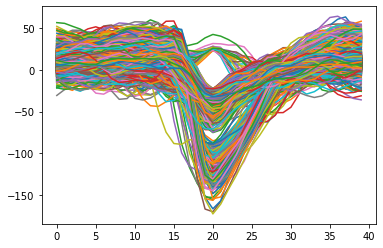

In [6]:
#观察波形分布
waveforms = detect.waveforms[0]
for i in range(np.shape(waveforms)[0]):
    plt.plot(waveforms[i,:])

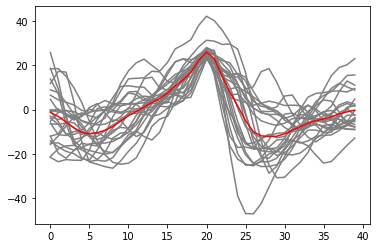

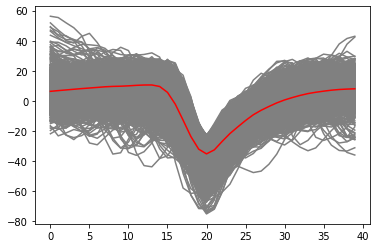

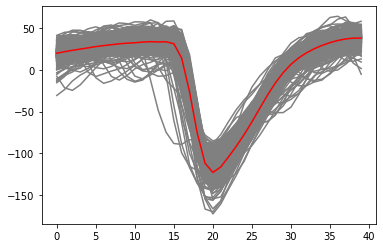

In [8]:
#分别绘制每组波形
group0 = detect.mannual_select_by_peaks(0,0,50)
group1 = detect.mannual_select_by_peaks(0,-78,0)
group2 = detect.mannual_select_by_peaks(0,-200,-78)
Detect.plot_average(group0)
Detect.plot_average(group1)
Detect.plot_average(group2)

explained_variance_ratio [0.79318862 0.0692313  0.04290723]


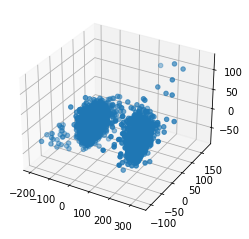

In [9]:
#PCA降维
from PCAanalysis import PCAanalysis

pca_res = PCAanalysis(detect,3)
pca_res.plot_pca()

In [10]:
file_name = 'patch_2_MEA.triggers.npy'
data_gt = np.load(os.path.join(Dir,file_name))
print(data_gt)#data_gt是juxtacellular电极记录到的发放采样点
file_name = 'patch_2_MEA.juxta.raw'
data_jx = np.memmap(os.path.join(Dir,file_name),dtype='float32',mode='r')
print(np.shape(data_jx))#data_jx是juxtacellular电极记录到的原始信号
spiketimes = np.zeros([len(data_gt)])
for t in range(len(data_jx)):
    if (t in data_gt) == True:
        spiketimes[list(data_gt).index(t)] = data_jx[t]

[  23846   23919   24029 ... 5997968 5998963 5999290]
(6000000,)


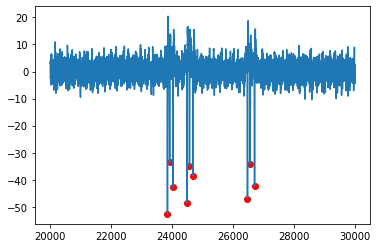

In [11]:
#显示部分发放点
plt.plot(np.linspace(20001,30000,10000),data_jx[20001:30001])
plt.scatter(data_gt[:9],spiketimes[:9],c='r')